# Correlation Analysis Between TESLA Stock Price, BITCOIN, and DOGECOIN

## Description

In 2021, we know that Elon Musk, the CEO of TESLA, talked about cryptocurrency on Twitter, escpecially BITCOIN and DOGECOIN. After that, the effect of him was very significant on the performance of TSLA Stock Price. Therfore, in this moment, I want to explore more about the relationship between three of them.


In [19]:
## Crawling the data from yahoo finance

import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

#get TESLA Data
tsla=yf.Ticker('TSLA')
tsla_data=tsla.history(period='3y')

#get BITOCOIN Data
btc=yf.Ticker('BTC-USD')
btc_data=btc.history(period='3y')

#get DOGECOIN Data
doge=yf.Ticker('DOGE-USD')
doge_data=doge.history(period='3y')

In [21]:
tsla_data.reset_index(inplace=True)
tsla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-02-05,62.498001,64.487999,62.450001,64.269997,33714000,0,0.0
1,2019-02-06,63.917999,64.848000,63.124001,63.444000,25192500,0,0.0
2,2019-02-07,62.660000,62.939999,60.599998,61.501999,32603000,0,0.0
3,2019-02-08,61.366001,61.490002,59.700001,61.160000,29221000,0,0.0
4,2019-02-11,62.320000,63.720001,62.099998,62.568001,35648500,0,0.0


In [22]:
btc_data.reset_index(inplace=True)
btc_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-02-05,3454.950928,3478.148193,3451.937012,3466.357422,5227549545,0,0
1,2019-02-06,3469.091797,3469.091797,3398.565430,3413.767822,5482196038,0,0
2,2019-02-07,3414.929443,3427.945557,3394.218506,3399.471680,5004962683,0,0
3,2019-02-08,3401.376465,3695.614014,3391.023682,3666.780273,7735623101,0,0
4,2019-02-09,3671.585938,3679.941406,3646.559326,3671.203613,6158833645,0,0


In [23]:
doge_data.reset_index(inplace=True)
doge_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-02-05,0.001899,0.001913,0.001880,0.001888,13983316,0,0
1,2019-02-06,0.001886,0.001902,0.001837,0.001866,15246340,0,0
2,2019-02-07,0.001869,0.001890,0.001839,0.001845,14228248,0,0
3,2019-02-08,0.001847,0.001957,0.001835,0.001956,17956052,0,0
4,2019-02-09,0.001952,0.001996,0.001923,0.001949,14455529,0,0


In [137]:
#Add new table that contains TSLA, BTC, and DOGE Price

tsla_data_close = tsla_data.loc[:,['Date','Close']]
tsla_data_close.rename(columns={'Close':'TSLA'},inplace=True)

btc_data_close = btc_data.loc[:,['Date','Close']]
btc_data_close.rename(columns={'Close':'BTC-USD'},inplace=True)

doge_data_close = doge_data.loc[:,['Date','Close']]
doge_data_close.rename(columns={'Close':'DOGE-USD'},inplace=True)


#Merge Data
df = tsla_data_close.merge(btc_data_close,left_on = 'Date',right_on='Date',how='left')\
        .merge(doge_data_close,left_on = 'Date',right_on='Date',how='left')

df.head(10)



,Date,TSLA,BTC-USD,DOGE-USD
0,2019-02-05,64.269997,3466.357422,0.001888
1,2019-02-06,63.444000,3413.767822,0.001866
2,2019-02-07,61.501999,3399.471680,0.001845
3,2019-02-08,61.160000,3666.780273,0.001956
4,2019-02-11,62.568001,3648.430664,0.001906
5,2019-02-12,62.362000,3653.528564,0.001894
6,2019-02-13,61.633999,3632.070557,0.001893
7,2019-02-14,60.754002,3616.880859,0.001897
8,2019-02-15,61.576000,3620.810791,0.001908
9,2019-02-19,61.127998,3947.094482,0.002067


In [45]:
#Check Missing Data

missing_data= df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Date
False    758
Name: Date, dtype: int64

TSLA
False    758
Name: TSLA, dtype: int64

BTC-USD
False    758
Name: BTC-USD, dtype: int64

DOGE-USD
False    758
Name: DOGE-USD, dtype: int64



In [139]:
df.to_csv('dataset.csv')

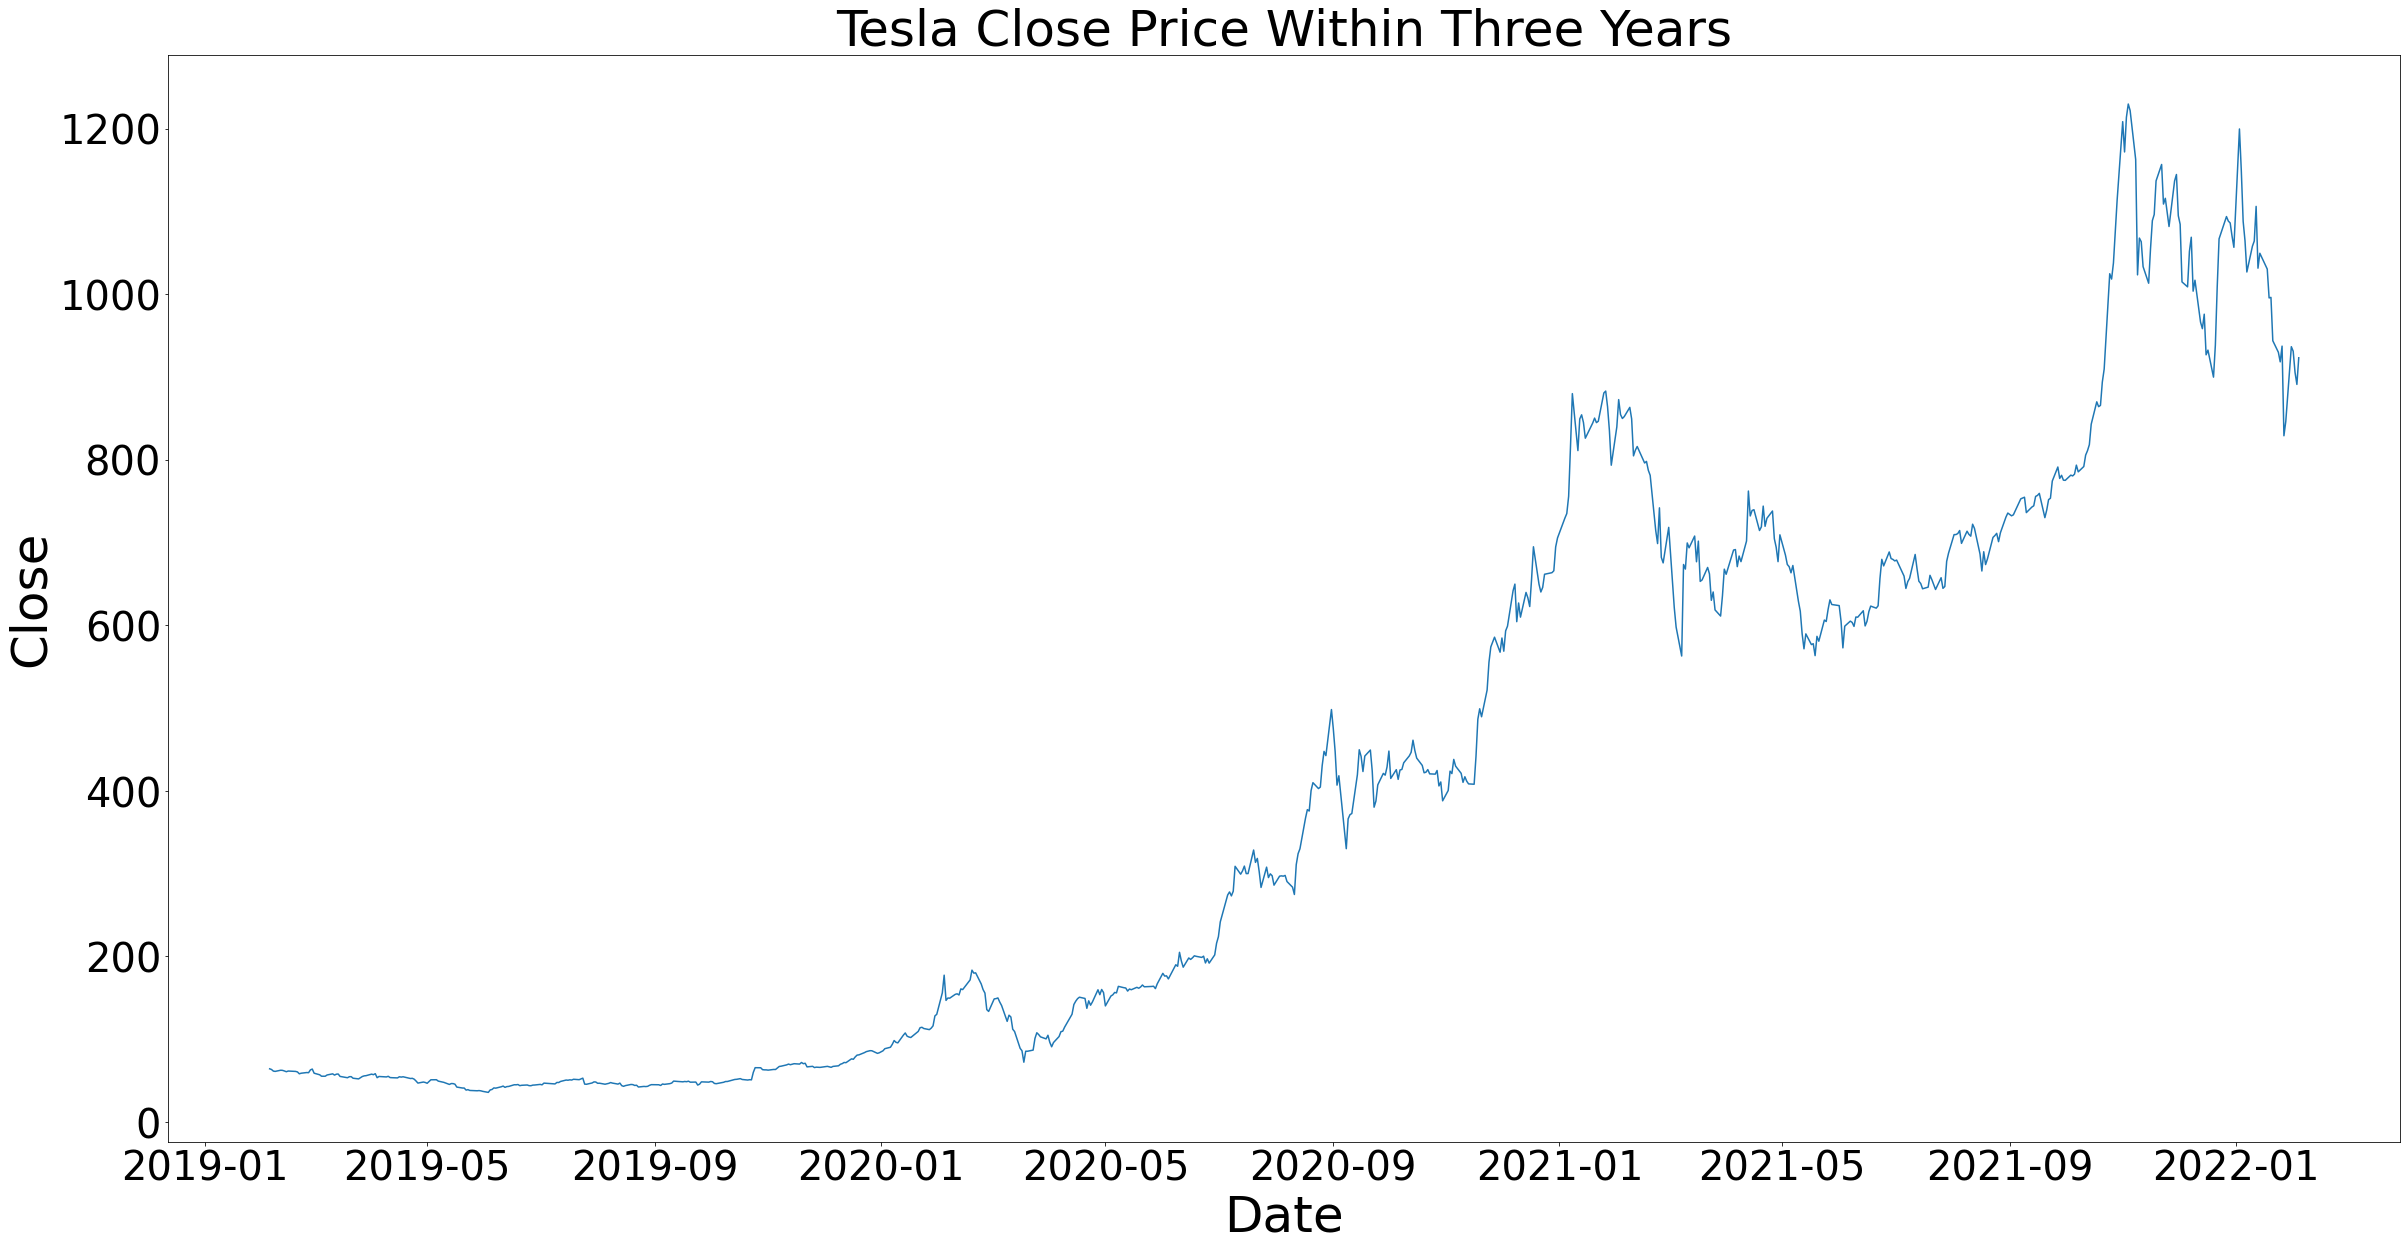

In [90]:
#Data Visualization

%matplotlib inline

import matplotlib.pyplot as plt

x=df['Date']
y1=df['TSLA']

plt.figure(figsize=(20, 10))

plt.ylabel('Close($US)',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Tesla Close Price Within Three Years',fontsize=20)
plt.plot(x,y1)

plt.show()



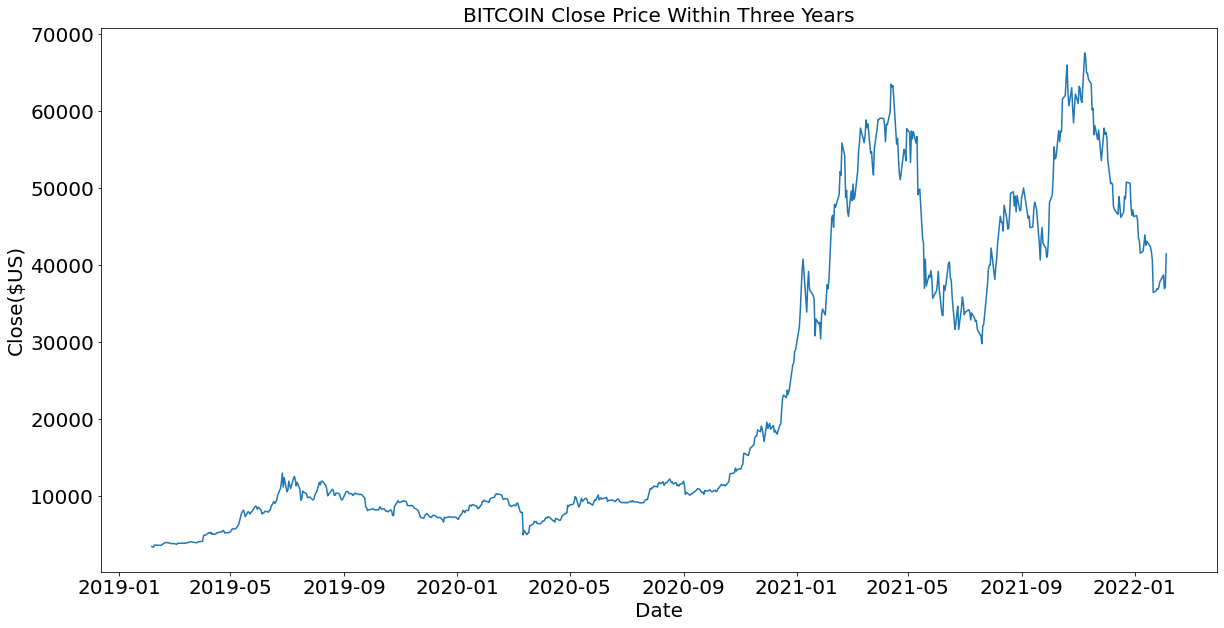

In [105]:
y2=df['BTC-USD']

plt.figure(figsize=(20, 10))

plt.ylabel('Close($US)',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('BITCOIN Close Price Within Three Years',fontsize=20)
plt.plot(x,y2)

plt.show()



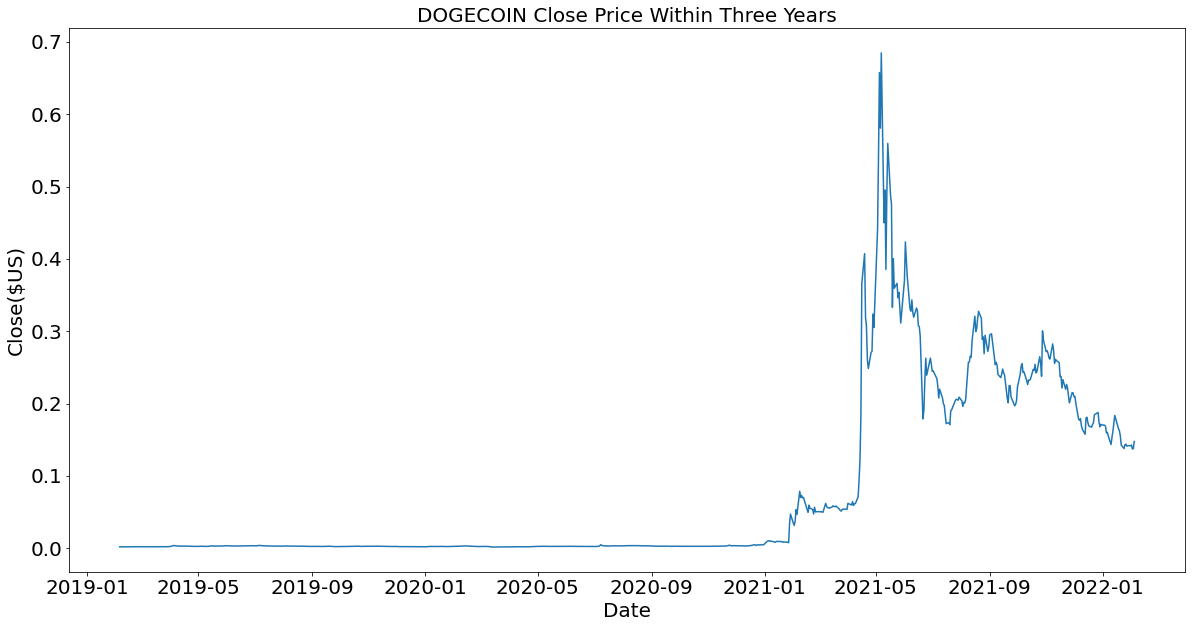

In [106]:
y3=df['DOGE-USD']

plt.figure(figsize=(20, 10))

plt.ylabel('Close($US)',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('DOGECOIN Close Price Within Three Years',fontsize=20)
plt.plot(x,y3)

plt.show()




## Correlation and Causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>



<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>



## Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

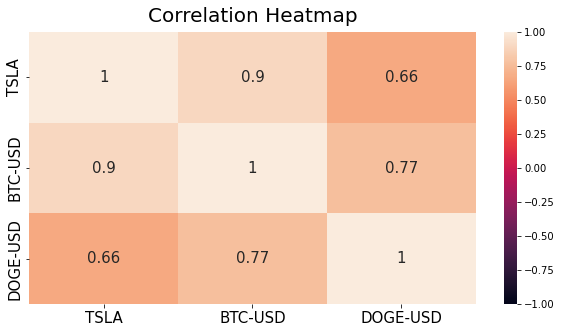

In [131]:
import seaborn as sns

plt.figure(figsize=(10,5))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,annot_kws={'size': 15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=10)

## BTC-USD and TSLA

Let's calculate the  Pearson Correlation Coefficient and P-value of 'BTC-USD' and 'TSLA'.



In [133]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['BTC-USD'], df['TSLA'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8968204424267822  with a P-value of P = 5.520856213586896e-270


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between BTC-USD and TSLA is statistically significant, and the linear relationship is quite strong (~0.896).</p>




## DOGE-USD and TSLA

Let's calculate the  Pearson Correlation Coefficient and P-value of 'DOGE-USD' and 'TSLA'.




In [135]:
pearson_coef, p_value = stats.pearsonr(df['DOGE-USD'], df['TSLA'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6605324507571515  with a P-value of P = 3.4447145740875906e-96


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between DOGE-USD and TSLA is statistically significant, and the linear relationship moderately strong (~0.66).</p>




### If you want to connect with me, please hit the link:
[Connect with my LinkedIn](https://www.linkedin.com/in/triimamwicaksono)